In [30]:
from sklearn.datasets import load_files
reviews_train = load_files("aclImdb/train")

text_train, y_train = reviews_train.data, reviews_train.target

In [31]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [32]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [34]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
# Мы строим модель и преобразуем данные в один этап
# Преобразование займет некоторое время и мы можем сэкономить время, выполнив обе операции сразу
document_topics = lda.fit_transform(X)

In [35]:
lda.components_.shape

(10, 10000)

In [36]:
# Для каждой темы (строки в components_) сортируем признаки (по возрастанию)
# Инвертируем строки с помощью [:, ::-1], чтобы получить сортировку по убыванию
import numpy as np
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Получаем имена признаков из векторизатора
feature_names = np.array(vect.get_feature_names_out())

In [37]:
import mglearn
# Выводим 10 тем
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        worst         plays         cast          show          
horror        didn          comedy        role          funny         
game          nothing       role          john          book          
effects       horror        school        performance   saw           
original      actually      town          star          years         
quite         minutes       harry         young         again         
fight         funny         played        play          10            
lot           actors        western       music         comedy        
however       re            joe           musical       am            
though        going         girl          plays         dvd           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
dire

In [38]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [39]:
import numpy as np

topics = np.array([7,16,24,25,28,36,37,45,51,53,53,63,89,97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)


topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
williams      car           camera        king          kelly         family        work          
robin         budget        silent        effects       race          father        music         
hood          low           fields        monster       day           son           style         
fox           shot          train         special       gene          mother        art           
tracy         shots         keaton        giant         star          parents       unique        
students      werewolf      buster        creature      singer        sam           visual        
iron          around        act           monsters      oscar         boy           cinema        
jerry         pretty        face          evil          frank         brother       anime         
wolf      

In [40]:
music = np.argsort(document_topics100[:, 45])[::-1]

for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) +b".\n")

b"If you were to cut an hour of this movie you might have something a little bit entertaining, although even then I don't think you'd have anything memorable. But at its full, seemingly endless length this movie just meanders on endlessly.\n"
b'After watching this film I had to wonder one thing. Why was this over two and half hours long? A very simple and pedestrian story of a few relationships between a group of adults.\n'
b"A dreary, hopelessly predictable film set in a most unpleasant setting (lower Coachella Valley). Acting is as amateurish as any I've seen.\n"
b"Secrets and Lies is my favourite movie so I was keen to see this. Unfortunately, it doesn't work on any level - the plot is unbelieveable and contrived, and the characters a little annoying.\n"
b"Having previously enjoyed Constantinos Giannaris's 'From The Edge Of The City', flawed though it was, I imagined this film might represent a coming to fruition of this director's potential.  Alas, this film fails on all fronts.\n"

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (75000,) and arg 3 with shape (50,).

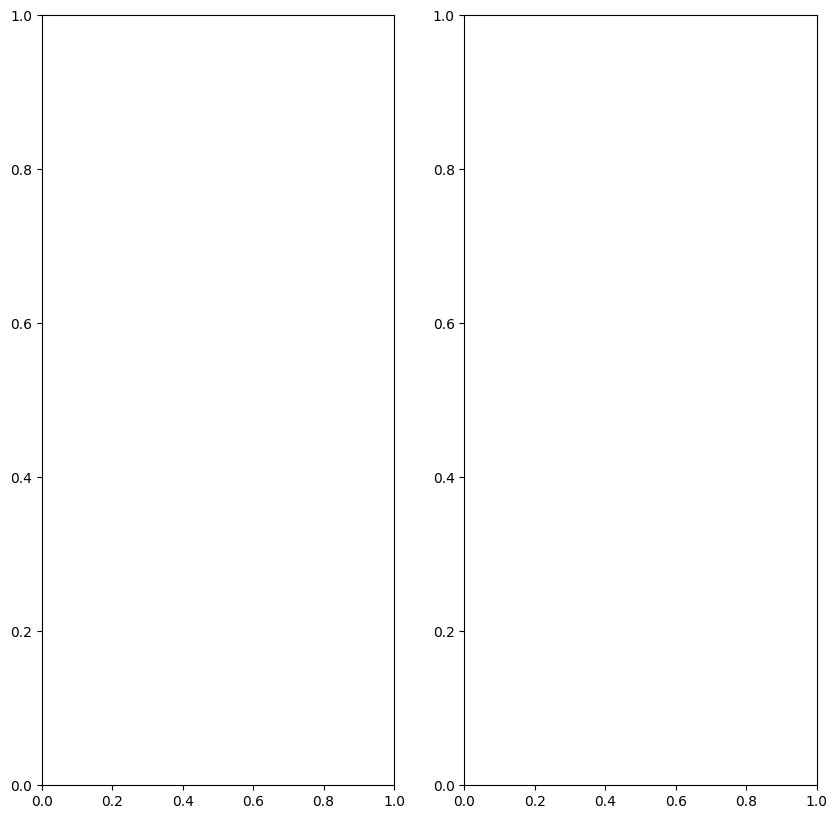

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + "".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100[:, start:end], axis=1)) 
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()
plt.show()

LinearRegression()

Коэффициенты модели: [ 0.55620551  0.29394877  0.55275045 -0.45457172 -0.15536361  0.18059293
 -0.46557658 -0.17708285 -0.50031019 -0.17708285 -0.18211124 -0.18211124
  0.16832523  0.3869288   0.26176886  0.39945468 -0.30498336 -0.45457172
 -0.30498336 -0.23023981  0.34796492 -0.23023981  0.29876811  0.17697384
  0.5985018  -0.23023981 -0.14227821 -0.28933635  0.18059293 -0.17708285
 -0.23023981  0.16832523  0.26176886  0.00405439  0.18059293  0.17697384
 -0.14227821  0.39945468  0.14133434 -0.14816711  0.3763136  -0.17708285
  0.07812068  0.29394877 -0.3157371  -0.05945917 -0.15536361 -0.10636583
  0.45578591  0.16832523 -0.23023981 -0.15536361  0.03778145  0.07812068
  0.16832523 -0.23023981  0.26176886 -0.28933635  0.16832523 -0.14227821
  0.18059293 -0.18211124 -0.18211124 -0.15536361 -0.23023981 -0.14227821
  0.34796492 -0.23023981 -0.1089949   0.00405439  0.17697384 -0.30498336]


Самые важные слова по весу:
Спасибо: 0.59850180421002
Быстрая: 0.556205507251654
Все: 0.5527504539912195
отличное: 0.45578591459489487
Очень: 0.3994546846137921
доволен: 0.3994546846137921
Отличное: 0.3869287994009952
качеством: 0.3763135964897069
Прекрасный: 0.3479649230037252
супер: 0.3479649230037252


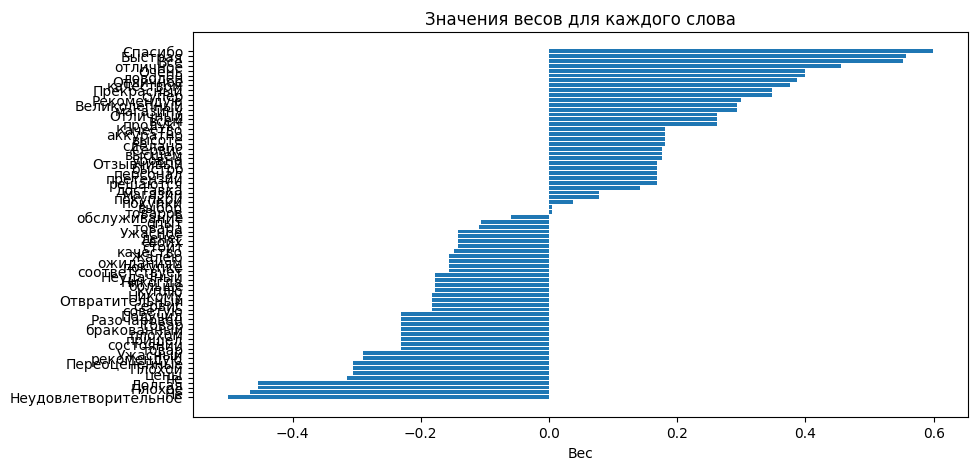